In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('./data/spotify-2023.csv',  encoding="ISO-8859-1")

In [3]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [4]:
# Agruparlos por el año
df_year = df.groupby('released_year')

In [5]:
# Mostra el dataframe original
df_year.obj

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
948,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
950,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [6]:
# Encontrar el máximo mes por grupo
df_year['released_month'].max()

released_year
1930     1
1942     1
1946    11
1950     1
1952     1
1957     1
1958     1
1959    11
1963    11
1968     7
1970    11
1971    12
1973     1
1975    10
1979    11
1982     5
1983     1
1984    11
1985     9
1986     3
1987     1
1991     9
1992     9
1994    10
1995    12
1996    11
1997     1
1998     3
1999    11
2000    11
2002     8
2003     9
2004     7
2005     9
2007     4
2008     1
2010    11
2011    10
2012    12
2013    12
2014    12
2015    11
2016    11
2017    12
2018    11
2019    12
2020    12
2021    12
2022    12
2023     7
Name: released_month, dtype: int64

In [7]:
# Encontrar el mínimo mes por grupo
df_year['released_month'].min()

released_year
1930     1
1942     1
1946    11
1950     1
1952     1
1957     1
1958     1
1959     1
1963    10
1968     7
1970    11
1971    12
1973     1
1975     1
1979    11
1982     1
1983     1
1984     1
1985     2
1986     1
1987     1
1991     9
1992     9
1994    10
1995     7
1996    11
1997     1
1998     3
1999     1
2000     1
2002     1
2003     3
2004     1
2005     9
2007     4
2008     1
2010     1
2011     1
2012     1
2013     1
2014     1
2015     1
2016     1
2017     1
2018     3
2019     1
2020     1
2021     1
2022     1
2023     1
Name: released_month, dtype: int64

In [8]:
# Encontrar el promedio de mes por cada grupo
df_year['released_month'].mean()

released_year
1930     1.000000
1942     1.000000
1946    11.000000
1950     1.000000
1952     1.000000
1957     1.000000
1958     1.000000
1959     6.000000
1963    10.666667
1968     7.000000
1970    11.000000
1971    12.000000
1973     1.000000
1975     5.500000
1979    11.000000
1982     3.000000
1983     1.000000
1984     5.750000
1985     5.500000
1986     2.000000
1987     1.000000
1991     9.000000
1992     9.000000
1994    10.000000
1995     9.500000
1996    11.000000
1997     1.000000
1998     3.000000
1999     3.000000
2000     7.250000
2002     3.500000
2003     6.000000
2004     3.500000
2005     9.000000
2007     4.000000
2008     1.000000
2010     5.142857
2011     3.500000
2012     5.000000
2013     4.692308
2014     4.692308
2015     4.818182
2016     7.722222
2017     6.000000
2018     6.700000
2019     7.888889
2020     6.054054
2021     8.210084
2022     6.440299
2023     3.971429
Name: released_month, dtype: float64

In [9]:
# Encontrar la media para varias columnas
df_year[['artist_count', 'in_apple_playlists']].mean()

,artist_count,in_apple_playlists
released_year,,
1930,3.000000,4.000000
1942,3.000000,73.000000
1946,1.000000,140.000000
1950,2.000000,126.000000
1952,1.000000,108.000000
1957,1.000000,98.500000
1958,1.666667,133.333333
1959,1.000000,76.500000
1963,1.000000,139.000000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [32]:
df_new2=df.groupby('artist(s)_name')
df_new2['track_name'].count()
#df_new2.rename({'track_name':'number of songs'},axis=1,inplace=True)


artist(s)_name
(G)I-DLE                                         2
21 Savage, Gunna                                 1
24kgoldn, Iann Dior                              1
50 Cent                                          1
A$AP Rocky, Metro Boomin, Roisee                 1
                                                ..
j-hope                                           1
j-hope, J. Cole                                  1
sped up 8282                                     1
sped up nightcore, ARIZONATEARS, Lil Uzi Vert    1
teto                                             1
Name: track_name, Length: 644, dtype: int64

In [15]:
df_year['artist(s)_name'].count()

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      1
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: artist(s)_name, dtype: int64

In [9]:
# Encontrar la media para varias columnas
df_new=df[['released_year','in_spotify_playlists', 'in_apple_playlists']]#.mean()
#df_new[['NSpotify','NApple']]=(df_new[['in_spotify_playlists', 'in_apple_playlists']]-df_new[['in_spotify_playlists', 'in_apple_playlists']].min())/(df_new[['in_spotify_playlists', 'in_apple_playlists']].max()-df_new[['in_spotify_playlists', 'in_apple_playlists']].min())
#df[['Nin_spotify_playlists','Nin_apple_playlists']] = scaler.fit_transform(df[['in_spotify_playlists','in_apple_playlists']])

df_new[['Nin_spotify_playlists','Nin_apple_playlists']]=scaler.fit_transform(df[['in_spotify_playlists','in_apple_playlists']])
df_new

C:\Users\diego\AppData\Local\Temp\ipykernel_26528\1682148254.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['Nin_spotify_playlists','Nin_apple_playlists']]=scaler.fit_transform(df[['in_spotify_playlists','in_apple_playlists']])
C:\Users\diego\AppData\Local\Temp\ipykernel_26528\1682148254.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['Nin_spotify_playlists','Nin_apple_playlists']]=scaler.fit_transform(df[['in_spotify_playlists','in_apple_playlists']])


,released_year,in_spotify_playlists,in_apple_playlists,Nin_spotify_playlists,Nin_apple_playlists
0,2023,553,43,0.009874,0.063988
1,2023,1474,48,0.027295,0.071429
2,2023,1397,94,0.025838,0.139881
3,2019,7858,116,0.148051,0.172619
4,2023,3133,84,0.058676,0.125000
...,...,...,...,...,...
947,2022,953,61,0.017440,0.090774
948,2022,1180,4,0.021734,0.005952
949,2022,573,2,0.010252,0.002976
950,2022,1320,29,0.024382,0.043155


In [12]:
group=df_new.groupby('released_year')

<Axes: xlabel='released_year'>

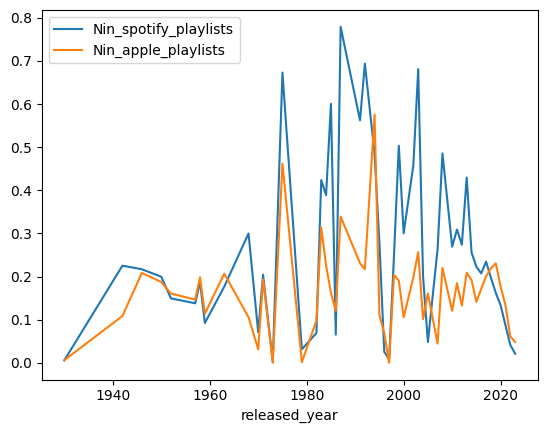

In [13]:
group[['Nin_spotify_playlists','Nin_apple_playlists']].mean().plot()

In [ ]:
# Imprimamos la primera entrada de cada grupo
df_year.first()

,track_name,artist(s)_name,artist_count,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
released_year,,,,,,,,,,,,,,,,,,,,,
1930,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",3,1,1,323,0,90598517,4,0,...,130,F#,Minor,65,49,80,22,4,7,5
1942,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1,1,11940,0,395591396,73,79,...,96,A,Major,23,19,25,91,0,40,3
1946,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,11,1,11500,0,389771964,140,72,...,139,C#,Major,36,22,15,84,0,11,4
1950,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1,1,10585,0,473248298,126,108,...,143,D,Major,60,86,32,88,0,34,6
1952,A Holly Jolly Christmas - Single Version,Burl Ives,1,1,1,7930,0,395591396,108,120,...,140,None,Major,67,81,36,64,0,15,3
1957,Jingle Bell Rock,Bobby Helms,1,1,1,10326,0,741301563,165,99,...,119,D,Major,74,78,37,84,0,6,3
1958,Rockin' Around The Christmas Tree,Brenda Lee,1,1,1,14994,0,769213520,191,168,...,140,G#,Major,70,85,41,71,0,45,5
1959,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,11,16,6512,0,446390129,88,1,...,134,C#,Major,45,72,24,91,0,18,4
1963,It's the Most Wonderful Time of the Year,Andy Williams,1,10,14,8879,0,663832097,182,107,...,202,G,Major,24,76,60,77,0,12,4


In [ ]:
group1 = df_year.get_group(2023)
group1

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,I'm Not Here To Make Friends,"Sam Smith, Calvin Harris, Jessie Reyez",3,2023,1,27,1890,0,103787664,86,...,115,NaN,Major,70,84,90,17,0,41,6
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790,88,...,122,G#,Major,64,25,89,0,0,15,9
385,VIBE (feat. Jimin of BTS),"TAEYANG, Jimin",2,2023,1,13,415,2,152850295,15,...,100,NaN,Major,79,60,68,7,0,26,4
398,Muï¿½ï¿½,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253,33,...,90,A#,Minor,68,83,71,3,0,31,8


In [ ]:
 type(group1)

pandas.core.frame.DataFrame

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Agrupar por año y mes
group_year_month = df.groupby(['released_year', 'released_month'])

In [ ]:
# Mostrar el primero de cada grupo
group_year_month.first()

track_name  \
released_year released_month                                                      
1930          1                                                 Agudo Mï¿½ï¿½gi   
1942          1                                                 White Christmas   
1946          11              The Christmas Song (Merry Christmas To You) - ...   
1950          1                          Let It Snow! Let It Snow! Let It Snow!   
1952          1                        A Holly Jolly Christmas - Single Version   
...                                                                         ...   
2023          3                                                            LALA   
              4                                                       un x100to   
              5                                                  WHERE SHE GOES   
              6                                                         vampire   
              7                             Seven (feat. Latto) (Explicit Ver.)   

                                                                 artist(s)_name  \
released_year released_month                                                      
1930          1                                         Styrx, utku INC, Thezth   
1942          1               Bing Crosby, John Scott Trotter & His Orchestr...   
1946          11                                                  Nat King Cole   
1950          1                               Frank Sinatra, B. Swanson Quartet   
1952          1                                                       Burl Ives   
...                                                                         ...   
2023          3                                                     Myke Towers   
              4                                       Bad Bunny, Grupo Frontera   
              5                                                       Bad Bunny   
              6                                                  Olivia Rodrigo   
              7                                                Latto, Jung Kook   

                              artist_count  released_day  \
released_year released_month                               
1930          1                          3             1   
1942          1                          3             1   
1946          11                         1             1   
1950          1                          2             1   
1952          1                          1             1   
...                                    ...           ...   
2023          3                          1            23   
              4                          2            17   
              5                          1            18   
              6                          1            30   
              7                          2            14   

                              in_spotify_playlists  in_spotify_charts  \
released_year released_month                                            
1930          1                                323                  0   
1942          1                              11940                  0   
1946          11                             11500                  0   
1950          1                              10585                  0   
1952          1                               7930                  0   
...                                            ...                ...   
2023          3                               1474                 48   
              4                               2876                 40   
              5                               3133                 50   
              6                               1397                113   
              7                                553                147   

                                streams  in_apple_playlists  in_apple_charts  \
released_year released_month                                                   
1930          1   

<Axes: xlabel='artist_count'>

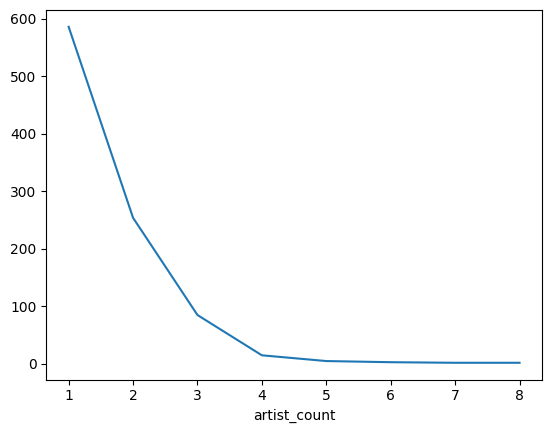

In [ ]:
df_count = df.groupby(['artist_count'])
df_count['artist_count'].count().plot()